**Trực quan hóa dữ liệu ngũ cốc**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
filename = '/content/cereal.csv'
# load dataset

df = pd.read_csv(filename)
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [3]:
# Kiểm tra dữ liệu có ổn hay không
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
# Chúng ta sẽ bỏ đi những cột không liên quan đến dinh dưỡng.
fields = ['shelf','weight','cups','rating']
df_new = df.drop(fields,axis=1)
df_new

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25
...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25


In [9]:
# Chuyển về độ tương quan
# Là 1 phép toán sẽ nhân các ma trận sẽ nhân các giá trị hàm lượng dinh dưỡng với nhau
corr = df_new.corr()
corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


Những giá trị âm sẽ chứng minh chúng không tương quan với nhau.
* Tiếp theo, chúng ta sẽ trực quan bảng số liệu lên, chúng ta sẽ sử dụng heatmaps để hiển thị

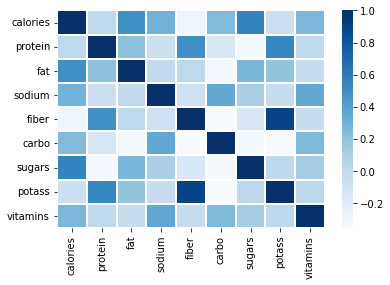

In [11]:
sns.heatmap(corr,cmap='Blues',linewidths=1)

Chúng ta dễ dàng thấy dữ liệu đối xứng nhau qua đường chéo, vì thế chúng ta chỉ cần lấy phần phái trên đường chéo mà thôi

In [13]:
one_corr = np.ones_like(corr,dtype=bool)
one_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [14]:
one_corr.shape

(9, 9)

In [15]:
corr.shape

(9, 9)

Như vậy là kích thước của chúng giống nhau,
tiếp theo chúng ta sẽ tách ma trận ra thành 2 nửa

In [16]:
mask = np.triu(one_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

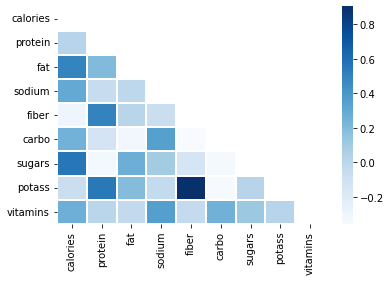

In [18]:
sns.heatmap(data=corr,mask=mask,cmap='Blues',linewidths=1)

In [20]:
# Để cho hình đẹp hơn chúng ta sẽ tìm cách bỏ đi dòng 1 cột cuối cùng
adjust_mask = mask[1:,:-1]
adjust_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [22]:
# chúng ta làm tương tự với dữ liệu gốc
adjusted_corr = corr.iloc[1:,:-1]
adjusted_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699


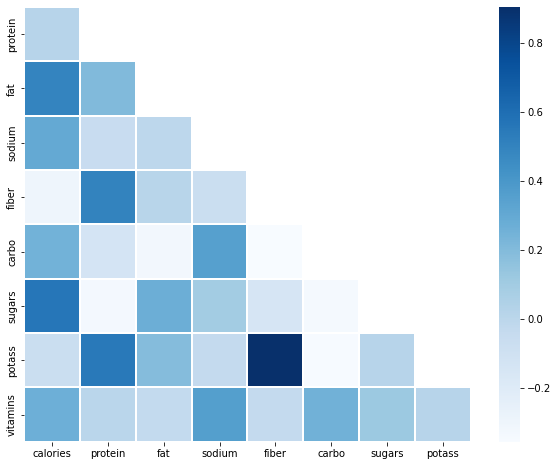

In [24]:
fig,ax = plt.subplots(figsize=(10,8)) # Phóng to biểu đồ lên
sns.heatmap(data=adjusted_corr,mask=adjust_mask,cmap='Blues',linewidths=1)

Chúng ta có thể in thêm giá trị lên biểu đồ


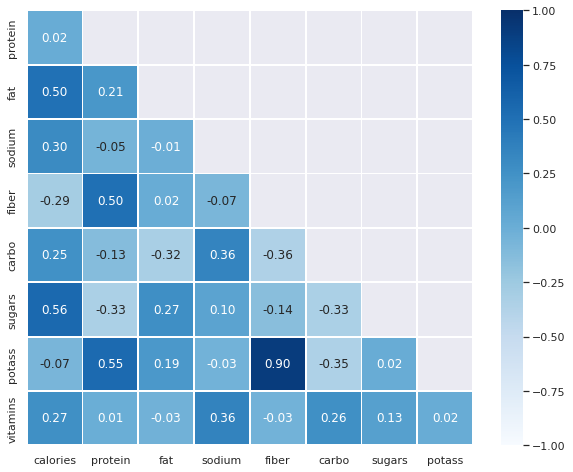

In [29]:
sns.set_theme()
fig,ax = plt.subplots(figsize=(10,8)) # Phóng to biểu đồ lên
sns.heatmap(data=adjusted_corr,mask=adjust_mask,cmap='Blues',linewidths=1,annot=True,fmt='.2f',vmin=-1,vmax=1)


Chúng ta sẽ định dạng viết hoa các tên cột.

Text(0.5, 1.0, 'BIỂU ĐỒ THỂ HIỆN ĐỘ TƯƠNG QUAN THÀNH PHẦN DINH DƯỠNG CÓ TRONG CÁC LOẠI NGŨ CỐC')

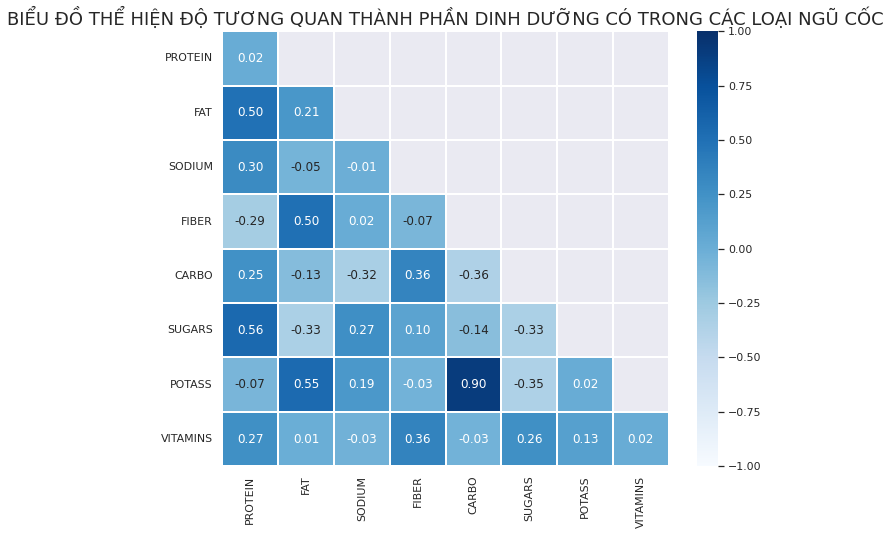

In [31]:
sns.set_theme()
fig,ax = plt.subplots(figsize=(10,8)) # Phóng to biểu đồ lên
sns.heatmap(data=adjusted_corr,mask=adjust_mask,cmap='Blues',linewidths=1,annot=True,fmt='.2f',vmin=-1,vmax=1)

yticks = [i.upper() for i in adjusted_corr.index]
xticks = [i.upper() for i in adjusted_corr.columns]

ax.set_yticklabels(yticks,rotation=0)
ax.set_xticklabels(yticks,rotation=90)
title = 'BIỂU ĐỒ THỂ HIỆN ĐỘ TƯƠNG QUAN THÀNH PHẦN DINH DƯỠNG CÓ TRONG CÁC LOẠI NGŨ CỐC'
ax.set_title(title,fontsize=18)

